In [1]:
from wordle_modeller import wordle_solver, formatgametohtml

import seaborn as sns
import matplotlib.pyplot as plt # for data visualization

import pandas as pd
import numpy as np

from IPython.core.display import display, HTML

sns.set_theme(style="darkgrid")
sns.color_palette()
sns.despine()

<Figure size 432x288 with 0 Axes>

In [2]:
g = wordle_solver(dict_file = 'full_five_letters_words.txt')

Loaded dictionary with 3450 words


In [3]:
f = g.analyse_frequency()
df1 = pd.DataFrame.from_dict(f, orient='index', columns=['frequency'])
df1.index.name = 'letter'
df1.sort_values(by=['frequency'], ascending=False)

,frequency
letter,
E,1861
S,1503
A,1475
R,1205
O,1138
L,992
T,962
I,957
N,781


<AxesSubplot:title={'center':'Frequency of letters in all the five letters words'}, xlabel='letter'>

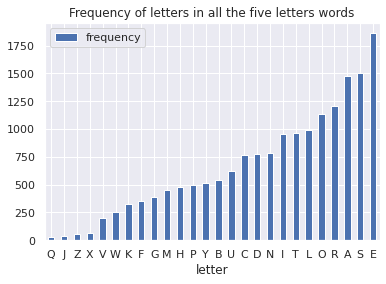

In [4]:
df1.plot(kind="bar", rot=0, title='Frequency of letters in all the five letters words')

In [5]:
g.frequency_rank(limit=20)

['AROSE',
 'LASER',
 'EARLS',
 'TEARS',
 'ASTER',
 'RATES',
 'STARE',
 'RAISE',
 'ARISE',
 'ALOES',
 'SNARE',
 'EARNS',
 'SANER',
 'DARES',
 'READS',
 'DEARS',
 'ACRES',
 'CARES',
 'SCARE',
 'RACES']

In [6]:
for word in ['snare', 'sleep', 'slept', 'tomas']:
    print ( g.check_rank(word) )

{'SNARE': 74, 'total': 3448}
{'SLEEP': 113, 'total': 3448}
{'SLEPT': 711, 'total': 3448}
{'TOMAS': 'not found', 'total': 3448}


## Let's start solving

In [32]:
#stupid mode
r0 = g.solve_many(use_smart=False, stupid_mode=True, N_GAMES=10000, exclude=0)
r0['success_rate']

0.0023

In [8]:
r1 = g.solve_many(use_smart=False, N_GAMES=1000, exclude=0)

In [9]:
r2 = g.solve_many(use_smart=True, N_GAMES=1000, exclude=0)

In [10]:
r3 = g.solve_many(use_smart=True, N_GAMES=1000, exclude=1)

In [11]:
r4 = g.solve_many(use_smart=True, N_GAMES=1000, exclude=2)

In [12]:
df1 = pd.DataFrame(data=r1['profile'])
df1.index.name = 'game'
df1.columns = ['success']
df1['use_smart'] = False
df1['exclude'] = 0
df1['strategy'] = 'No smart start, no exclusion'

In [13]:
df2 = pd.DataFrame(data=r2['profile'])
df2.index.name = 'game'
df2.columns = ['success']
df2['use_smart'] = True
df2['exclude'] = 0
df2['strategy'] = 'Smart start, no exclusion'

In [14]:
df3 = pd.DataFrame(data=r3['profile'])
df3.index.name = 'game'
df3.columns = ['success']
df3['use_smart'] = True
df3['exclude'] = 1
df3['strategy'] = 'Smart start, 1 exclusion'

In [15]:
df4 = pd.DataFrame(data=r4['profile'])
df4.index.name = 'game'
df4.columns = ['success']
df4['use_smart'] = True
df4['exclude'] = 2
df4['strategy'] = 'Smart start, 2 exclusions'

In [16]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,success,use_smart,exclude,strategy
0,3,False,0,"No smart start, no exclusion"
1,7,False,0,"No smart start, no exclusion"
2,5,False,0,"No smart start, no exclusion"
3,2,False,0,"No smart start, no exclusion"
4,4,False,0,"No smart start, no exclusion"
...,...,...,...,...
3995,7,True,2,"Smart start, 2 exclusions"
3996,4,True,2,"Smart start, 2 exclusions"
3997,5,True,2,"Smart start, 2 exclusions"
3998,5,True,2,"Smart start, 2 exclusions"


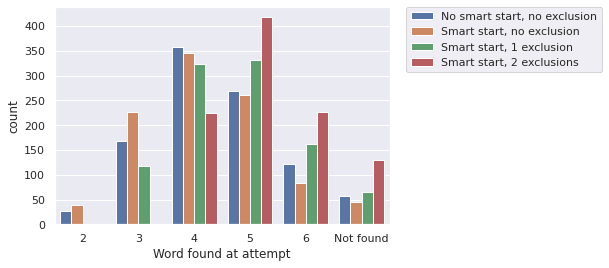

In [19]:
p = sns.countplot(data=df, x='success', hue='strategy')
p.set_xticklabels([ 2, 3, 4, 5, 6, 'Not found'])
p.set_xlabel("Word found at attempt")

# Put the legend out of the figure
p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [30]:
print ('success rate: ', r1['success_rate'], r2['success_rate'], r3['success_rate'], r4['success_rate'])
print ('average success attempt: ', np.mean( r1['profile']), np.mean( r2['profile']),np.mean( r2['profile']), np.mean( r3['profile']))

success rate:  0.943 0.954 0.934 0.87
average success attempt:  4.465 4.26 4.26 4.737


In [3]:
r = g.solve(use_smart=True, exclude=2)

In [4]:
game = r['game']

In [5]:
game

[('EARNS', 'e____'),
 ('DIMLY', '___L_'),
 ('THORN', '_H___'),
 ('WHELP', 'WHELP')]

In [6]:
display(HTML(formatgametohtml(game)))